In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [12]:
print(sns.get_dataset_names())

['anagrams', 'anscombe', 'attention', 'brain_networks', 'car_crashes', 'diamonds', 'dots', 'exercise', 'flights', 'fmri', 'gammas', 'geyser', 'iris', 'mpg', 'penguins', 'planets', 'tips', 'titanic']


In [13]:
crash_df = sns.load_dataset('car_crashes')
crash_df.head()

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,abbrev
0,18.8,7.332,5.640,18.048,15.040,784.55,145.08,AL
1,18.1,7.421,4.525,16.290,17.014,1053.48,133.93,AK
2,18.6,6.510,5.208,15.624,17.856,899.47,110.35,AZ
3,22.4,4.032,5.824,21.056,21.280,827.34,142.39,AR
4,12.0,4.200,3.360,10.920,10.680,878.41,165.63,CA


# distribution Plots

## distplot

In [14]:
# sns.distplot(crash_df['not_distracted'], kde=False)

## joinplot

In [15]:
# sns.jointplot(x='speeding', y='alcohol', data=crash_df, kind='reg')

## pairplot

In [16]:
tips_df = sns.load_dataset('tips')
tips_df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


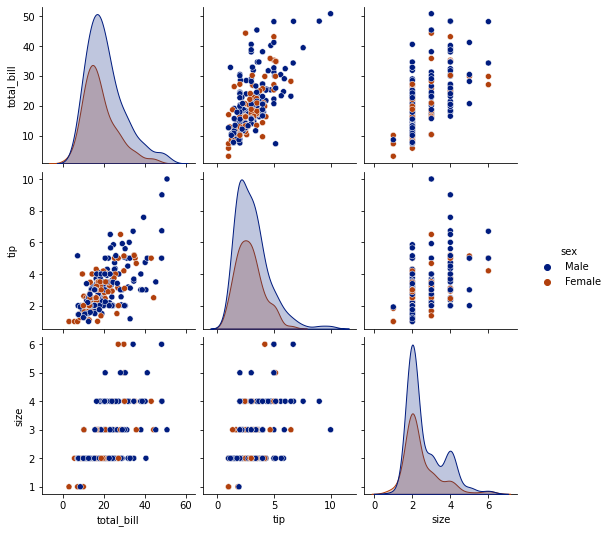

In [17]:
# sns.pairplot(data=crash_df)

tips_df = sns.load_dataset('tips')
sns.pairplot(data=tips_df, hue='sex', palette='dark')

In [18]:
# get all the clients based on the size by .count()
# get the max tip given in every 'Size' with .max
# u can get the average in every group with .mean()

groupde = tips_df.groupby('size')['tip']
groupde.count()


size
1      4
2    156
3     38
4     37
5      5
6      4
Name: tip, dtype: int64

In [19]:
# get all the single people with the smallest tip
one_tip = tips_df['size'] == 1
tips_df[one_tip].head()

,total_bill,tip,sex,smoker,day,time,size
67,3.07,1.00,Female,Yes,Sat,Dinner,1
82,10.07,1.83,Female,No,Thur,Lunch,1
111,7.25,1.00,Female,No,Sat,Dinner,1
222,8.58,1.92,Male,Yes,Fri,Lunch,1


### Get the max tip given

In [123]:
r = tips_df['tip'] == 10.0
tips_df[r]

,total_bill,tip,sex,smoker,day,time,size
170,50.81,10.0,Male,Yes,Sat,Dinner,3


<AxesSubplot:xlabel='tip'>

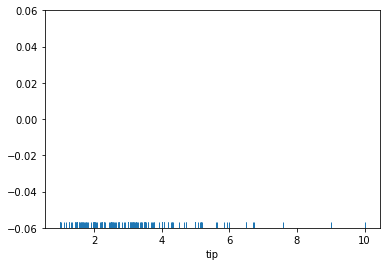

In [125]:
sns.rugplot(x='tip', data=tips_df)

# styling

<Figure size 576x288 with 0 Axes>

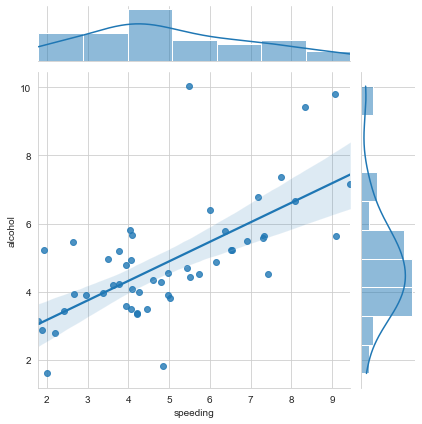

In [128]:
sns.set_style('whitegrid')
plt.figure(figsize=(8,4))
sns.jointplot(x='speeding', y='alcohol', data=crash_df, kind='reg')

## barplot

<AxesSubplot:xlabel='sex', ylabel='tip'>

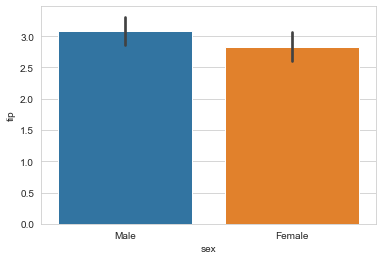

In [129]:
sns.barplot(x='sex', y='tip', data=tips_df)

## boxplot
#### find who tend to spend more money on each day [ men or women ] ????

<AxesSubplot:xlabel='day', ylabel='total_bill'>

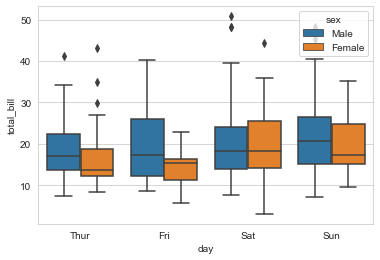

In [130]:
sns.boxplot(x='day', y='total_bill', hue='sex', data=tips_df)
# men tends to spend more money on Friday vs on Saturday

#### find who tend to spend more money on each day [ smoker or non-smoker ] ????

<AxesSubplot:xlabel='day', ylabel='total_bill'>

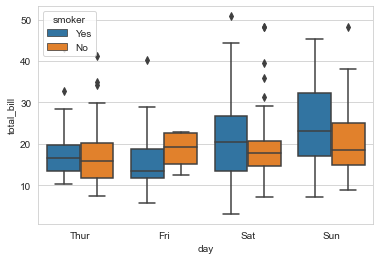

In [134]:
sns.boxplot(x='day', y='total_bill', hue='smoker', data=tips_df)
# smokers tend to spend more money on Sunday vs on Saturday

<AxesSubplot:xlabel='day', ylabel='total_bill'>

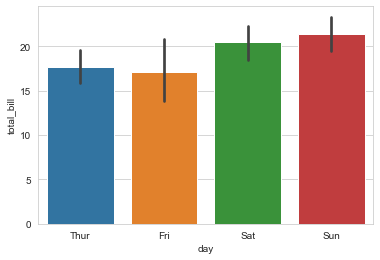

In [138]:
sns.barplot(x='day', y='total_bill', data=tips_df)


# strip plot

<AxesSubplot:xlabel='day', ylabel='total_bill'>

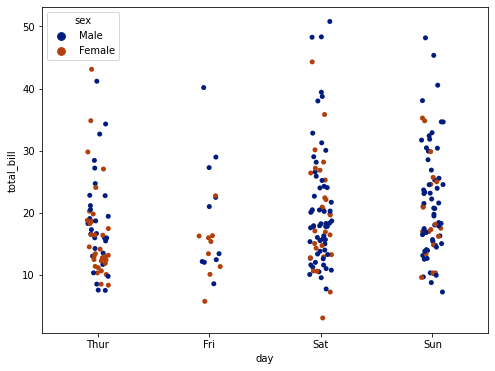

In [25]:
plt.figure(figsize=(8,6))
# sns.set_style = 'green'
# sns.set_context = 'paper'
sns.stripplot(x='day', y='total_bill', data=tips_df, hue='sex', palette='dark')

# flights df

In [28]:
flights = sns.load_dataset('flights')
flights.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


### pivot_table

In [30]:
flights = flights.pivot_table(values='passengers', columns='year', index='month')
flights

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
Jan,112,115,145,171,196,204,242,284,315,340,360,417
Feb,118,126,150,180,196,188,233,277,301,318,342,391
Mar,132,141,178,193,236,235,267,317,356,362,406,419
Apr,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
Jun,135,149,178,218,243,264,315,374,422,435,472,535
Jul,148,170,199,230,264,302,364,413,465,491,548,622
Aug,148,170,199,242,272,293,347,405,467,505,559,606
Sep,136,158,184,209,237,259,312,355,404,404,463,508


<AxesSubplot:xlabel='year', ylabel='month'>

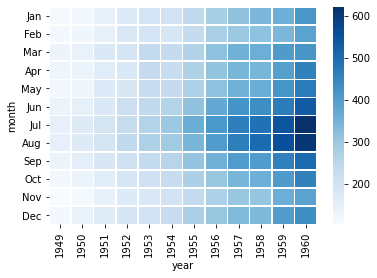

In [35]:
sns.heatmap(data=flights, cmap='Blues', linecolor='white', linewidths=0.5)

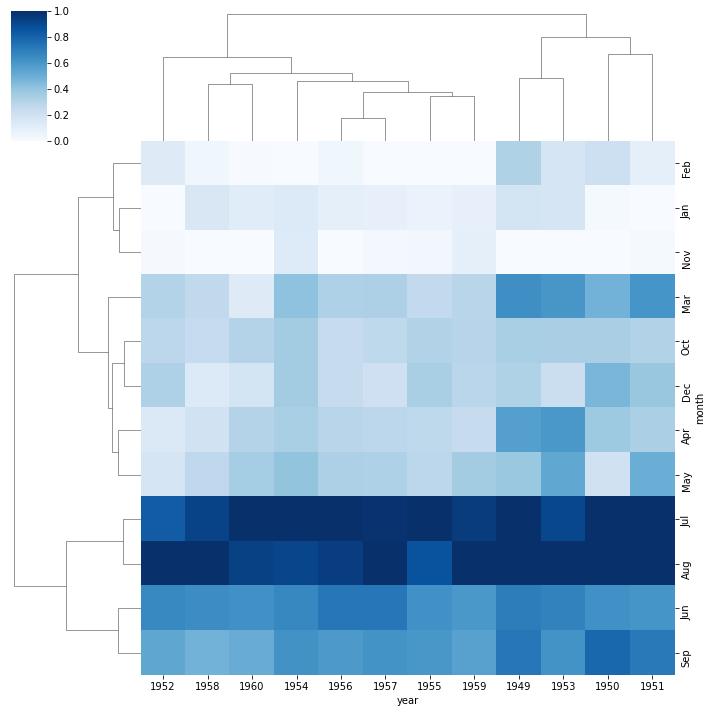

In [45]:
sns.clustermap(data=flights, cmap='Blues', standard_scale=1)

## Pair plot

In [42]:
iris_df = sns.load_dataset('iris')
iris_df.head(3)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa


In [47]:
# we need to pop the species cuz it is not an int
# species = iris_df.pop('species')
# sns.clustermap(iris_df)

## Pair Grid
### will help you to present in many and with d/t plots

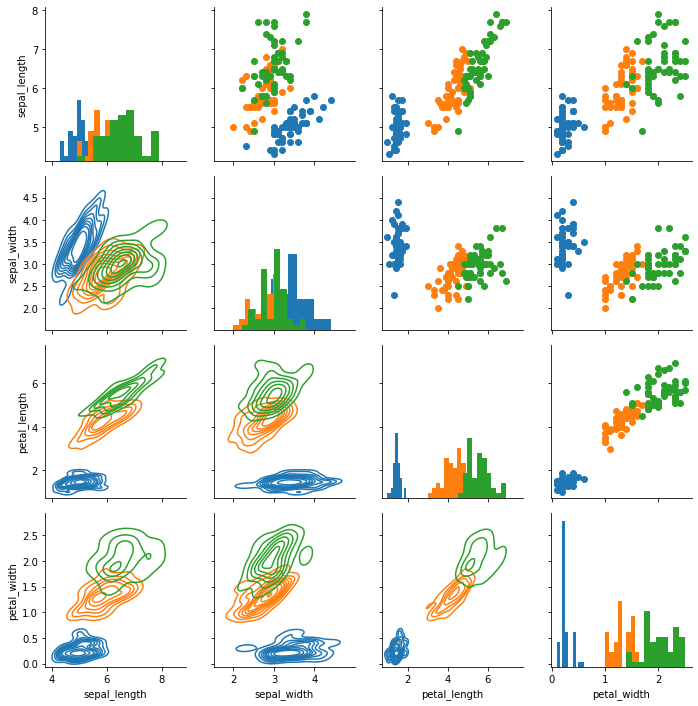

In [53]:
# pair plots ----> gives u d/t kinds of plots BUT 
# if you want to  have a specific control ---> use Pair Grid
iris_df = sns.load_dataset('iris')

iris_grid = sns.PairGrid(data=iris_df, hue='species')
iris_grid.map_diag(plt.hist)
iris_grid.map_upper(plt.scatter)
iris_grid.map_lower(sns.kdeplot)

# facet Grid

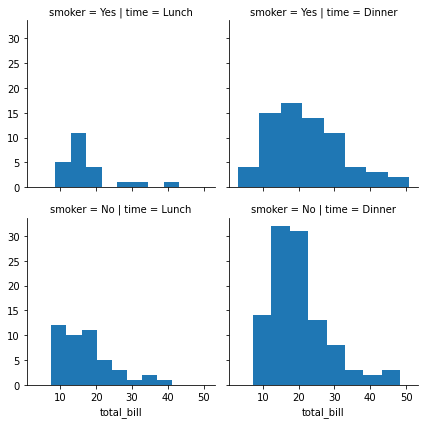

In [59]:
tips_facet_g = sns.FacetGrid(data=tips_df, col='time', row='smoker')
tips_facet_g.map(plt.hist, 'total_bill', bins=8)

# ====================================================================

In [3]:
x = [i for i in range(10)]
print(x)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
